In [9]:
# Dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
from scipy.stats import linregress
from pprint import pprint

In [10]:
# citpy to determine city based on latitude and longitude
from citipy import citipy

from config import WEATHER_API_KEY

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


ImportError: cannot import name 'WEATHER_API_KEY' from 'config' (/Users/simonxu/data_du/hw/06-Python-APIs/python-api-challege/config.py)

In [10]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

In [11]:
# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

637

In [20]:
df = pd.DataFrame(cities)
df.head()

,0
0,port alfred
1,khatanga
2,busselton
3,kiruna
4,cockburn town


In [13]:
OW_Endpoint = "https://api.openweathermap.org/data/2.5/weather"
data = []
i = 0
while i < len(cities):
    params = {
        "q": cities[i],
        "appid": WEATHER_API_KEY
    }
    response = requests.get(url=OW_Endpoint, params=params)
    data.append(response.json())
    if (i +1) % 60 == 0:
        time.sleep(5)
    i += 1
    
    

pprint(data)

[{'base': 'stations',
  'clouds': {'all': 5},
  'cod': 200,
  'coord': {'lat': -33.5906, 'lon': 26.891},
  'dt': 1612066011,
  'id': 964432,
  'main': {'feels_like': 290.81,
           'humidity': 92,
           'pressure': 1008,
           'temp': 289.82,
           'temp_max': 289.82,
           'temp_min': 289.82},
  'name': 'Port Alfred',
  'sys': {'country': 'ZA',
          'id': 2011314,
          'sunrise': 1612064019,
          'sunset': 1612113479,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 288, 'speed': 1.08}},
 {'base': 'stations',
  'clouds': {'all': 43},
  'cod': 200,
  'coord': {'lat': 71.9667, 'lon': 102.5},
  'dt': 1612066011,
  'id': 2022572,
  'main': {'feels_like': 224.66,
           'grnd_level': 1044,
           'humidity': 78,
           'pressure': 1049,
           'sea_level': 1049,
         

           'temp_min': 296.48},
  'name': 'Newcastle',
  'sys': {'country': 'AU',
          'id': 9605,
          'sunrise': 1612034101,
          'sunset': 1612083445,
          'type': 1},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 190, 'speed': 7.72}},
 {'base': 'stations',
  'clouds': {'all': 8},
  'cod': 200,
  'coord': {'lat': -20.0064, 'lon': 57.6608},
  'dt': 1612066025,
  'id': 934479,
  'main': {'feels_like': 303.79,
           'humidity': 72,
           'pressure': 1015,
           'temp': 301.48,
           'temp_max': 301.48,
           'temp_min': 301.48},
  'name': 'Grand Gaube',
  'sys': {'country': 'MU',
          'id': 2002134,
          'sunrise': 1612057970,
          'sunset': 1612104757,
          'type': 3},
  'timezone': 14400,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
             

 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 19.7297, 'lon': -155.09},
  'dt': 1612065810,
  'id': 5855927,
  'main': {'feels_like': 294.1,
           'humidity': 65,
           'pressure': 1018,
           'temp': 294.47,
           'temp_max': 298.15,
           'temp_min': 291.48},
  'name': 'Hilo',
  'rain': {'1h': 0.16},
  'sys': {'country': 'US',
          'id': 7881,
          'sunrise': 1612025753,
          'sunset': 1612066286,
          'type': 1},
  'timezone': -36000,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 20, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 65.6145, 'lon': -37.6368},
  'dt': 1612066014,
  'id': 3424607,
  'main': {'feels_like': 259.94,
           'humidity': 53,
           'pressure': 1019,
           'temp': 265.15,
           'temp_max': 2

  'name': 'Yurimaguas',
  'sys': {'country': 'PE', 'sunrise': 1612004796, 'sunset': 1612049315},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 194, 'speed': 0.53}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 28.8947, 'lon': 64.4101},
  'dt': 1612066074,
  'id': 1180729,
  'main': {'feels_like': 286.67,
           'grnd_level': 920,
           'humidity': 28,
           'pressure': 1016,
           'sea_level': 1016,
           'temp': 290.25,
           'temp_max': 290.25,
           'temp_min': 290.25},
  'name': 'Dalbandin',
  'sys': {'country': 'PK', 'sunrise': 1612060288, 'sunset': 1612099199},
  'timezone': 18000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 226, '

  'id': 3440777,
  'main': {'feels_like': 288.79,
           'grnd_level': 1009,
           'humidity': 91,
           'pressure': 1012,
           'sea_level': 1012,
           'temp': 291.57,
           'temp_max': 291.57,
           'temp_min': 291.57},
  'name': 'Rocha',
  'sys': {'country': 'UY', 'sunrise': 1612083424, 'sunset': 1612133066},
  'timezone': -10800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 126, 'speed': 7.33}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -33.9258, 'lon': 18.4232},
  'dt': 1612066104,
  'id': 3369157,
  'main': {'feels_like': 291.74,
           'humidity': 77,
           'pressure': 1010,
           'temp': 292.82,
           'temp_max': 293.15,
           'temp_min': 292.04},
  'name': 'Cape Town',
  'sys': {'country': 'ZA',
          'id': 1899,
          'sunrise': 1612066015

  'cod': 200,
  'coord': {'lat': 48.8286, 'lon': -67.522},
  'dt': 1612066128,
  'id': 6696260,
  'main': {'feels_like': 254.8,
           'humidity': 67,
           'pressure': 1022,
           'temp': 260.8,
           'temp_max': 261.15,
           'temp_min': 260.15},
  'name': 'Matane',
  'sys': {'country': 'CA',
          'id': 503,
          'sunrise': 1612008150,
          'sunset': 1612041852,
          'type': 1},
  'timezone': -18000,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 320, 'speed': 3.6}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 64.8569, 'lon': -147.8028},
  'dt': 1612066130,
  'id': 5859699,
  'main': {'feels_like': 248.91,
           'humidity': 71,
           'pressure': 1023,
           'temp': 252.71,
           'temp_max': 254.15,
          

           'temp': 269.15,
           'temp_max': 269.15,
           'temp_min': 269.15},
  'name': 'Kotovo',
  'sys': {'country': 'RU', 'sunrise': 1612067811, 'sunset': 1612101089},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 145, 'speed': 5.39}},
 {'base': 'stations',
  'clouds': {'all': 72},
  'cod': 200,
  'coord': {'lat': -25.9653, 'lon': 32.5892},
  'dt': 1612066167,
  'id': 1040652,
  'main': {'feels_like': 304.74,
           'humidity': 88,
           'pressure': 1009,
           'temp': 299.26,
           'temp_max': 299.26,
           'temp_min': 299.26},
  'name': 'Maputo',
  'sys': {'country': 'MZ',
          'id': 2030503,
          'sunrise': 1612063446,
          'sunset': 1612111317,
          'type': 3},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon'

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 140, 'speed': 9.26}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 42.7297, 'lon': 133.0839},
  'dt': 1612066204,
  'id': 2013258,
  'main': {'feels_like': 258.1,
           'grnd_level': 1028,
           'humidity': 75,
           'pressure': 1030,
           'sea_level': 1030,
           'temp': 262.92,
           'temp_max': 262.92,
           'temp_min': 262.92},
  'name': "Vrangel'",
  'sys': {'country': 'RU', 'sunrise': 1612045409, 'sunset': 1612081111},
  'timezone': 36000,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 321, 'speed': 2.16}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 18.6853, 'lon': 12.9164},
  'dt': 1612066043,
 

               'main': 'Clouds'}],
  'wind': {'deg': 110, 'gust': 7.2, 'speed': 4.63}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 90},
  'cod': 200,
  'coord': {'lat': 62.7945, 'lon': 22.8282},
  'dt': 1612066244,
  'id': 637219,
  'main': {'feels_like': 259.11,
           'humidity': 85,
           'pressure': 989,
           'temp': 262.69,
           'temp_max': 263.15,
           'temp_min': 262.15},
  'name': 'Seinäjoki',
  'sys': {'country': 'FI',
          'id': 1358,
          'sunrise': 1612076535,
          'sunset': 1612102914,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 0.51}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': -17.5333, 'lon': -149.3333},
  'dt': 1612066245,
  'id': 4033356,
  'main': {'feels_

  'timezone': 19800,
  'visibility': 4000,
  'weather': [{'description': 'haze',
               'icon': '50d',
               'id': 721,
               'main': 'Haze'}],
  'wind': {'deg': 66, 'speed': 3.09}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 73.5069, 'lon': 80.5464},
  'dt': 1612065994,
  'id': 1507390,
  'main': {'feels_like': 231.32,
           'grnd_level': 1035,
           'humidity': 80,
           'pressure': 1041,
           'sea_level': 1041,
           'temp': 236.88,
           'temp_max': 236.88,
           'temp_min': 236.88},
  'name': 'Dikson',
  'sys': {'country': 'RU', 'sunrise': 0, 'sunset': 0},
  'timezone': 25200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 147, 'speed': 2.33}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 3.1001, 'lon': 98.4908},
  'dt': 1612

           'pressure': 1015,
           'temp': 301.15,
           'temp_max': 301.15,
           'temp_min': 301.15},
  'name': 'Esperance',
  'sys': {'country': 'AU',
          'id': 9525,
          'sunrise': 1612041170,
          'sunset': 1612090719,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01d',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 30, 'speed': 3.6}},
 {'base': 'stations',
  'clouds': {'all': 75},
  'cod': 200,
  'coord': {'lat': 38.7333, 'lon': -27.0667},
  'dt': 1612066308,
  'id': 3372760,
  'main': {'feels_like': 289.03,
           'humidity': 94,
           'pressure': 1021,
           'temp': 290.58,
           'temp_max': 291.15,
           'temp_min': 289.82},
  'name': 'Praia da Vitória',
  'sys': {'country': 'PT',
          'id': 6895,
          'sunrise': 1612083297,
          'sunset': 1612120104,
          'type': 1},
  'timezone': -360

  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'clear sky',
               'icon': '01n',
               'id': 800,
               'main': 'Clear'}],
  'wind': {'deg': 259, 'speed': 3}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 36.8197, 'lon': 21.7049},
  'dt': 1612066341,
  'id': 257122,
  'main': {'feels_like': 278.33,
           'humidity': 93,
           'pressure': 1010,
           'temp': 280.5,
           'temp_max': 283.71,
           'temp_min': 277.15},
  'name': 'Methóni',
  'sys': {'country': 'GR',
          'id': 6621,
          'sunrise': 1612071371,
          'sunset': 1612108617,
          'type': 1},
  'timezone': 7200,
  'visibility': 9000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 131, 'speed': 1.88}},
 {'base': 'stations',
  'clouds': {'all': 85},
  'cod': 200,
  'coord': {'lat': 10.9995, 'lon

  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 0, 'speed': 1.03}},
 {'base': 'stations',
  'clouds': {'all': 15},
  'cod': 200,
  'coord': {'lat': -25.6962, 'lon': 28.7492},
  'dt': 1612066368,
  'id': 1105726,
  'main': {'feels_like': 294.58,
           'humidity': 94,
           'pressure': 1015,
           'temp': 292.14,
           'temp_max': 293.15,
           'temp_min': 290.37},
  'name': 'Ekangala',
  'rain': {'1h': 0.14},
  'sys': {'country': 'ZA',
          'id': 1999,
          'sunrise': 1612064394,
          'sunset': 1612112212,
          'type': 1},
  'timezone': 7200,
  'visibility': 10000,
  'weather': [{'description': 'light rain',
               'icon': '10d',
               'id': 500,
               'main': 'Rain'}],
  'wind': {'deg': 70, 'speed': 0.51}},
 {'base': 'stations',
  'clouds': {'all': 5},
  'cod': 200,
  'coord': {'lat': 11.0616, 'lon': -0.2417},
  'd

           'pressure': 987,
           'temp': 269.26,
           'temp_max': 269.26,
           'temp_min': 269.26},
  'name': 'Tikhvin',
  'sys': {'country': 'RU',
          'id': 2012333,
          'sunrise': 1612072810,
          'sunset': 1612101502,
          'type': 3},
  'timezone': 10800,
  'visibility': 4255,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 170, 'speed': 2.58}},
 {'base': 'stations',
  'clouds': {'all': 3},
  'cod': 200,
  'coord': {'lat': 69.3833, 'lon': 178.4167},
  'dt': 1612066000,
  'id': 2123814,
  'main': {'feels_like': 234.97,
           'grnd_level': 1039,
           'humidity': 82,
           'pressure': 1039,
           'sea_level': 1039,
           'temp': 240.49,
           'temp_max': 240.49,
           'temp_min': 240.49},
  'name': 'Leningradskiy',
  'sys': {'country': 'RU', 'sunrise': 1612043370, 'sunset': 1612061388},
  'timezone': 43

          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 130, 'speed': 1.54}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 2.3, 'lon': 111.8167},
  'dt': 1612066434,
  'id': 1735902,
  'main': {'feels_like': 306.27,
           'humidity': 78,
           'pressure': 1011,
           'temp': 301.01,
           'temp_max': 301.15,
           'temp_min': 300.93},
  'name': 'Sibu',
  'sys': {'country': 'MY',
          'id': 9369,
          'sunrise': 1612046729,
          'sunset': 1612090001,
          'type': 1},
  'timezone': 28800,
  'visibility': 10000,
  'weather': [{'description': 'scattered clouds',
               'icon': '03d',
               'id': 802,
               'main': 'Clouds'}],
  'wind': {'deg': 0, 'speed': 0.51}},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,

  'wind': {'deg': 46, 'speed': 1.73}},
 {'base': 'stations',
  'clouds': {'all': 20},
  'cod': 200,
  'coord': {'lat': 58.5169, 'lon': -117.136},
  'dt': 1612066459,
  'id': 5975004,
  'main': {'feels_like': 246.47,
           'humidity': 84,
           'pressure': 1015,
           'temp': 251.15,
           'temp_max': 251.15,
           'temp_min': 251.15},
  'name': 'High Level',
  'sys': {'country': 'CA',
          'id': 867,
          'sunrise': 1612022290,
          'sunset': 1612051530,
          'type': 1},
  'timezone': -25200,
  'visibility': 10000,
  'weather': [{'description': 'few clouds',
               'icon': '02n',
               'id': 801,
               'main': 'Clouds'}],
  'wind': {'deg': 56, 'speed': 1.39}},
 {'base': 'stations',
  'clouds': {'all': 32},
  'cod': 200,
  'coord': {'lat': -0.4139, 'lon': -65.0192},
  'dt': 1612066460,
  'id': 3662489,
  'main': {'feels_like': 300.61,
           'grnd_level': 1006,
           'humidity': 88,
           'pressure': 10

               'icon': '04d',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 158, 'speed': 4.92}},
 {'base': 'stations',
  'clouds': {'all': 61},
  'cod': 200,
  'coord': {'lat': 0.1833, 'lon': 30.0833},
  'dt': 1612066496,
  'id': 232066,
  'main': {'feels_like': 293.48,
           'grnd_level': 903,
           'humidity': 58,
           'pressure': 1011,
           'sea_level': 1011,
           'temp': 293.63,
           'temp_max': 293.63,
           'temp_min': 293.63},
  'name': 'Kasese',
  'sys': {'country': 'UG', 'sunrise': 1612066188, 'sunset': 1612109778},
  'timezone': 10800,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 342, 'speed': 1.07}},
 {'base': 'stations',
  'clouds': {'all': 100},
  'cod': 200,
  'coord': {'lat': -28.783, 'lon': 32.0377},
  'dt': 1612066497,
  'id': 962367,
  'main': {'feels_like': 300.25

  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 20, 'speed': 2.57}},
 {'base': 'stations',
  'clouds': {'all': 83},
  'cod': 200,
  'coord': {'lat': -22.6667, 'lon': 167.4833},
  'dt': 1612066046,
  'id': 2137773,
  'main': {'feels_like': 295.12,
           'grnd_level': 996,
           'humidity': 79,
           'pressure': 1005,
           'sea_level': 1005,
           'temp': 297.88,
           'temp_max': 297.88,
           'temp_min': 297.88},
  'name': 'Vao',
  'sys': {'country': 'NC', 'sunrise': 1612031364, 'sunset': 1612078642},
  'timezone': 39600,
  'visibility': 10000,
  'weather': [{'description': 'broken clouds',
               'icon': '04d',
               'id': 803,
               'main': 'Clouds'}],
  'wind': {'deg': 118, 'speed': 9.81}},
 {'base': 'stations',
  'clouds': {'all': 40},
  'cod': 200,
  'coord': {'lat': 62.1564, 'lon': -7.1664},
  'dt': 1612066538,

           'humidity': 77,
           'pressure': 1021,
           'temp': 286.23,
           'temp_max': 287.15,
           'temp_min': 285.37},
  'name': 'Estepona',
  'sys': {'country': 'ES',
          'id': 7026,
          'sunrise': 1612077766,
          'sunset': 1612115112,
          'type': 1},
  'timezone': 3600,
  'visibility': 10000,
  'weather': [{'description': 'overcast clouds',
               'icon': '04n',
               'id': 804,
               'main': 'Clouds'}],
  'wind': {'deg': 270, 'speed': 11.32}},
 {'cod': '404', 'message': 'city not found'},
 {'base': 'stations',
  'clouds': {'all': 0},
  'cod': 200,
  'coord': {'lat': 29.0331, 'lon': 21.5482},
  'dt': 1612066003,
  'id': 86049,
  'main': {'feels_like': 282.12,
           'grnd_level': 1010,
           'humidity': 47,
           'pressure': 1015,
           'sea_level': 1015,
           'temp': 286.93,
           'temp_max': 286.93,
           'temp_min': 286.93},
  'name': 'Jalu',
  'sys': {'country': 'LY', '

In [14]:
len(data)

637

## Save data to weather_data.json

In [15]:
with open('weather_data.json', 'w') as jsonfile:
    json.dump(data, jsonfile)

## Read data from weather_data.json

In [16]:
with open('weather_data.json') as json_data:
    data = json.load(json_data)

pprint(data[0])

{'base': 'stations',
 'clouds': {'all': 5},
 'cod': 200,
 'coord': {'lat': -33.5906, 'lon': 26.891},
 'dt': 1612066011,
 'id': 964432,
 'main': {'feels_like': 290.81,
          'humidity': 92,
          'pressure': 1008,
          'temp': 289.82,
          'temp_max': 289.82,
          'temp_min': 289.82},
 'name': 'Port Alfred',
 'sys': {'country': 'ZA',
         'id': 2011314,
         'sunrise': 1612064019,
         'sunset': 1612113479,
         'type': 3},
 'timezone': 7200,
 'visibility': 10000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 288, 'speed': 1.08}}


In [17]:
le

637

In [51]:
df = pd.DataFrame({"City" : cities})
for name in ["Latitude", "Longitude", "Temperature F", "Humidity %", "Cloudiness %", "Wind Speed MPH"]:
    df[name] = ""
df.head()

,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,port alfred,,,,,,
1,khatanga,,,,,,
2,busselton,,,,,,
3,kiruna,,,,,,
4,cockburn town,,,,,,


In [52]:
OW_Endpoint = "https://api.openweathermap.org/data/2.5/weather"

for index, row in df.iterrows():
    params = {
        "q": df.loc[index, "City"], # df.iloc[index, 0] would raise index error because drop() doesn't modify/reset index. 
        "appid": WEATHER_API_KEY,
        "units": "imperial"
    }
    try:
        response = requests.get(url=OW_Endpoint, params=params)
    except requests.exceptions.RequestException:
        # Drop current row if request raise errors
        df.drop(index, inplace=True)
    else:
        data = response.json()
        try: 
            df.loc[index, "Latitude"] = data["coord"]["lat"]
            df.loc[index, "Longitude"] = data["coord"]["lon"]
            df.loc[index, "Temperature F"] = data["main"]["temp"]
            df.loc[index, "Humidity %"] = data["main"]["humidity"]
            df.loc[index, "Cloudiness %"] = data["clouds"]["all"]
            df.loc[index, "Wind Speed MPH"] = data["wind"]["speed"]
        except (KeyError, IndexError): 
            # Drop current row if there is missing field/result
            df.drop(index, inplace=True)
    # The open weather API policy is 60 calls/minute, so wait for 5 seconds every 60 API calls
    if (index + 1) % 60 == 0:
        time.sleep(5)


In [55]:
df

# for index, row in df.iterrows():
#     params = {
#         "q": df.iloc[index, 0],
#         "appid": WEATHER_API_KEY,
#         "units": "imperial"
#     }

,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,port alfred,-33.5906,26.891,72,84,9,4
1,khatanga,71.9667,102.5,-41.6,80,34,7.4
2,busselton,-33.65,115.3333,61.88,84,0,1.99
3,kiruna,67.8557,20.2251,15.8,92,90,11.5
4,cockburn town,21.4612,-71.1419,74.62,73,84,21
...,...,...,...,...,...,...,...
632,sudak,44.85,34.9667,46.98,84,98,11.23
633,batagay-alyta,67.8006,130.4114,-34.78,82,100,2.06
634,hirara,24.8,125.2833,67.78,68,77,17.2
635,tommot,58.9564,126.2925,-39.17,76,100,8.03


In [63]:
display(len(df))
df.reset_index()

582

,index,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,0,port alfred,-33.5906,26.891,72,84,9,4
1,1,khatanga,71.9667,102.5,-41.6,80,34,7.4
2,2,busselton,-33.65,115.3333,61.88,84,0,1.99
3,3,kiruna,67.8557,20.2251,15.8,92,90,11.5
4,4,cockburn town,21.4612,-71.1419,74.62,73,84,21
...,...,...,...,...,...,...,...,...
577,632,sudak,44.85,34.9667,46.98,84,98,11.23
578,633,batagay-alyta,67.8006,130.4114,-34.78,82,100,2.06
579,634,hirara,24.8,125.2833,67.78,68,77,17.2
580,635,tommot,58.9564,126.2925,-39.17,76,100,8.03


In [59]:
df.to_csv("weather_data.csv")

In [61]:
pd.read_csv("weather_data.csv")

,Unnamed: 0,City,Latitude,Longitude,Temperature F,Humidity %,Cloudiness %,Wind Speed MPH
0,0,port alfred,-33.5906,26.8910,72.00,84,9,4.00
1,1,khatanga,71.9667,102.5000,-41.60,80,34,7.40
2,2,busselton,-33.6500,115.3333,61.88,84,0,1.99
3,3,kiruna,67.8557,20.2251,15.80,92,90,11.50
4,4,cockburn town,21.4612,-71.1419,74.62,73,84,21.00
...,...,...,...,...,...,...,...,...
577,632,sudak,44.8500,34.9667,46.98,84,98,11.23
578,633,batagay-alyta,67.8006,130.4114,-34.78,82,100,2.06
579,634,hirara,24.8000,125.2833,67.78,68,77,17.20
580,635,tommot,58.9564,126.2925,-39.17,76,100,8.03


## Temperature (F) vs. Latitude

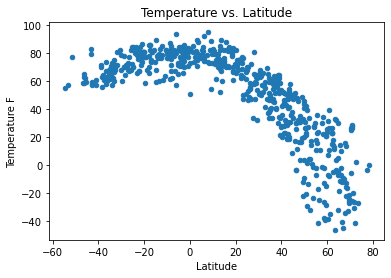

In [76]:
df.plot(x="Latitude", y="Temperature F", kind="scatter", title="Temperature vs. Latitude")

### Observation:
- In north hemisphere, it is obvious that the temperature drop when latitude increase.
- In South hemisphere, the chart doesn't show obvious relationship between temperature and latitude because there are very less cities picked between latitude -40 ~ -80.
    

## Humidity (%) vs. Latitude

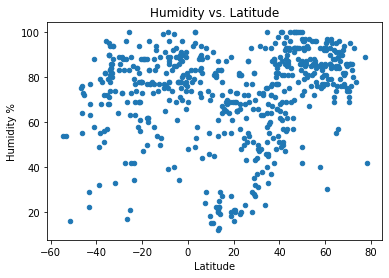

In [77]:
df.plot(x="Latitude", y="Humidity %", kind="scatter", title="Humidity vs. Latitude")

### Observation
- There isn't obvious relationship between humidity and latitude

## Humidity (%) vs. Latitude

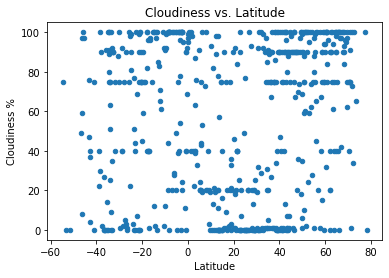

In [78]:
df.plot(x="Latitude", y="Cloudiness %", kind="scatter", title="Cloudiness vs. Latitude")

### Observation
- There isn't obvious relationship between cloudiness and latitude

## Cloudiness (%) vs. Latitude

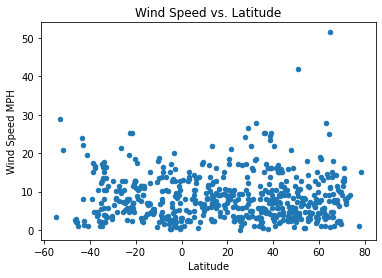

In [79]:
df.plot(x="Latitude", y="Wind Speed MPH", kind="scatter", title="Wind Speed vs. Latitude")

### Observation
- There isn't obvious relationship between wind speed and latitude

## Linear Regression

In [169]:
# Create a function to do linear regression
def linear_regression(x, y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
#     plt.figure(FigureClass=fig)
    plt.plot(x, regress_values, "r-")
    
    return line_eq, rvalue
#     if x.max() > 0:
#         plt.annotate(line_eq, (65, 105), fontsize=12, color="red")
#         plt.annotate()
#     if x.min() < 0:
#         plt.annotate(line_eq, (-80, 105), fontsize=12, color="red")

    
    

In [178]:
# Create a function to plot Northern Hemisphere and Southern Hemisphere
def regression_south_north(df, x_label, y_label):
    x_global = df[x_label].astype(float)
    y_global = df[y_label].astype(float)

    fig = plt.figure(figsize=(20,10))
    plt.scatter(x_global, y_global)
    plt.axvline(x = 0, color = 'b', label = 'axvline - full height') 
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{y_label} vs. {x_label}")
    plt.ylim(0, 120)
    plt.xlim(-90, 90)

    south_df = df[df["Latitude"] < 0 ]
    north_df = df[df["Latitude"] >= 0]
    
    # Northern Hemisphere
    (line_eq, r_value) = linear_regression(
        x=north_df[x_label].astype(float), 
        y=north_df[y_label].astype(float)
    )
    plt.annotate("Northern Hemisphere", (60, 115), fontsize=15, color="red")
    plt.annotate(line_eq, (60, 110), fontsize=12, color="red")
    plt.annotate(f"Value of r: {round(r_value, 2)}", (60, 105), fontsize=12, color="red" )
    

    # Southern Hemisphere
    (line_eq, r_value) = linear_regression(
        x=south_df[x_label].astype(float), 
        y=south_df[y_label].astype(float))
    plt.annotate("Southern Hemisphere", (-80, 115), fontsize=15, color="red")
    plt.annotate(line_eq, (-80, 110), fontsize=12, color="red")
    plt.annotate(f"Value of r: {round(r_value, 2)}", (-80, 105), fontsize=12, color="red" )

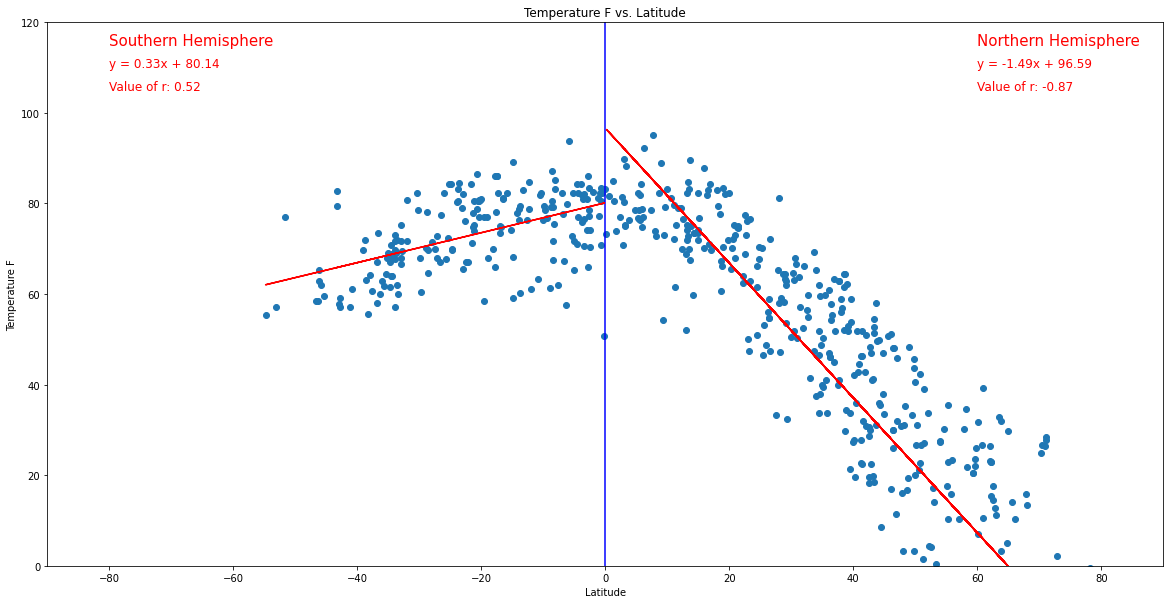

In [179]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Temperature F"
)

### Obersvation
#### Northern Hemisphere
- rvalue is -0.87.  The absolute value is greater than 0.7 
- Temperature and Latitude has strong correlation
- Temperature drops when Latitude in Northern Hemisphere increase
#### Southern Hemisphere
- rvalue is 0.52. The absolute value is greater than 0.5 and less then 0.7
- Temperature and Latitude has moderate correlation
- Notice that there is less cities when latitude is from -40 to -80

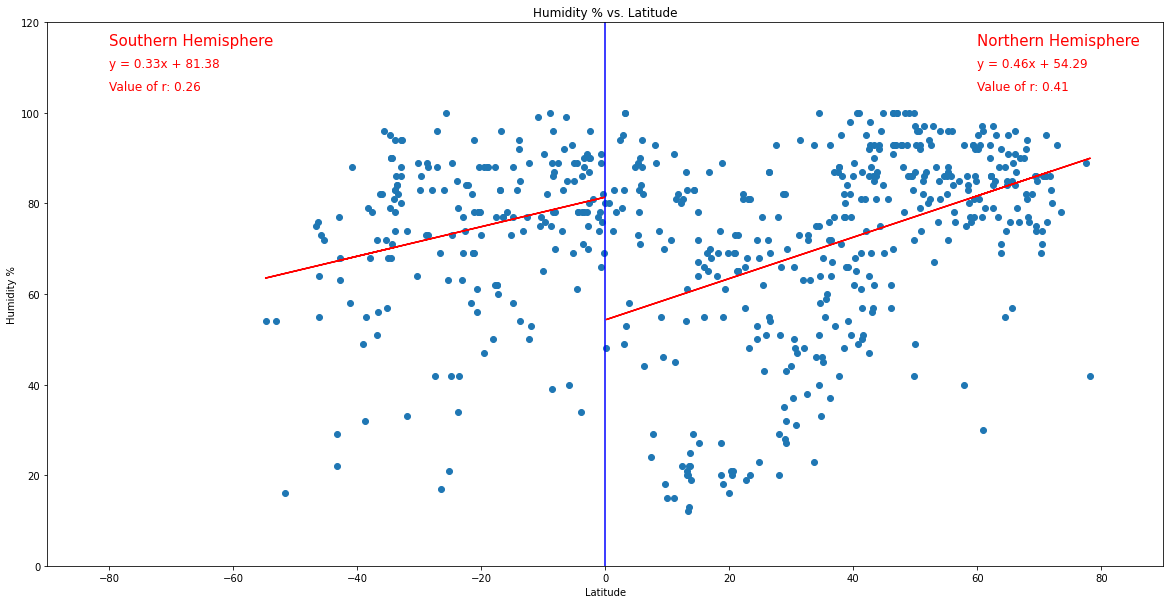

In [180]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Humidity %"
)

### Obersvation
#### Northern Hemisphere
- rvalue is 0.41.  The absolute value is less than 0.5 and greater than 0.3.
- Humidity and Latitude has weak correlation
#### Southern Hemisphere
- rvalue is 0.26.  The absolute value is less than 0.3.
- Humidity and Latitude has none or very weak correlation


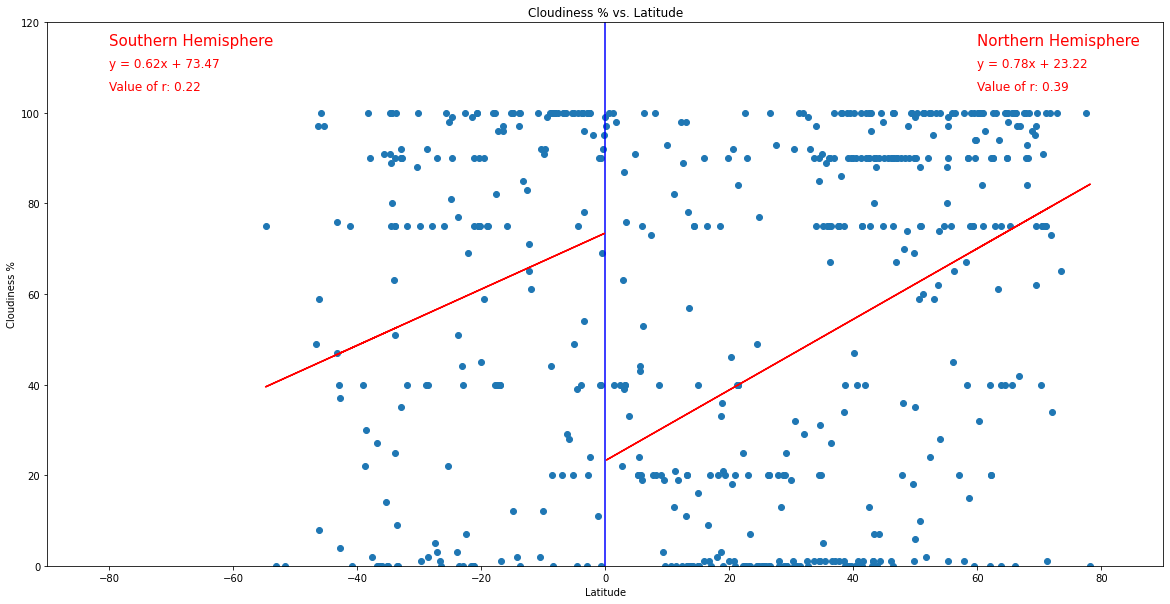

In [181]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Cloudiness %"
)

### Obersvation
#### Northern Hemisphere
- rvalue is 0.39.  The absolute value is greater than 0.3 and less than 0.5 
- Cloudiness and Latitude has weak correlation
#### Southern Hemisphere
- rvalue is 0.22. The absolute value is less then 0.3
- Cloudiness and Latitude has none or very weak correlation

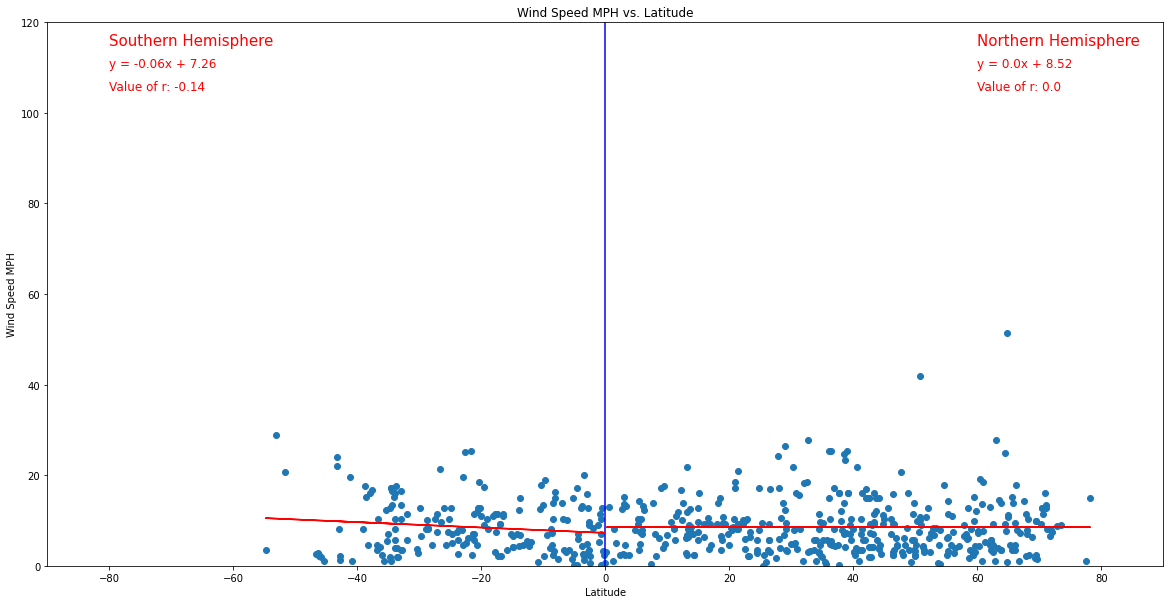

In [182]:
regression_south_north(
    df=df,
    x_label="Latitude",
    y_label="Wind Speed MPH"
)

### Obersvation
#### Northern Hemisphere
- rvalue is 0.0.  
- Wind speed and Latitude has none correlation
#### Southern Hemisphere
- rvalue is -0.14. 
- Wind speed and Latitude has none correlation